Estimated p_L table (rounded):
model            Model_A_C=1                                             \
platform supercond_best_0.1% supercond_better_0.5% supercond_typical_1%   
d                                                                         
3                  2.041e-02             5.102e-01            2.041e+00   
5                  2.915e-03             3.644e-01            2.915e+00   
7                  4.165e-04             2.603e-01            4.165e+00   
9                  5.950e-05             1.859e-01            5.950e+00   
11                 8.500e-06             1.328e-01            8.500e+00   
13                 1.214e-06             9.486e-02            1.214e+01   
15                 1.735e-07             6.776e-02            1.735e+01   

model                           Model_B_C=0.1                        \
platform trapped_ion_0.2% supercond_best_0.1% supercond_better_0.5%   
d                                                                     
3    

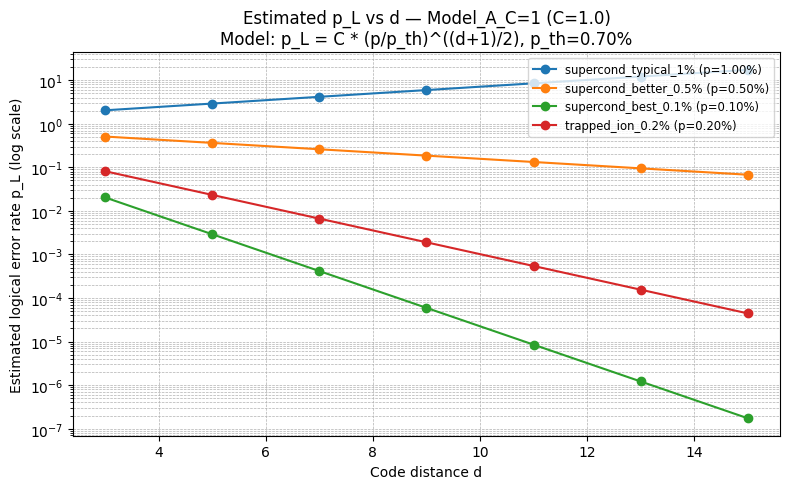

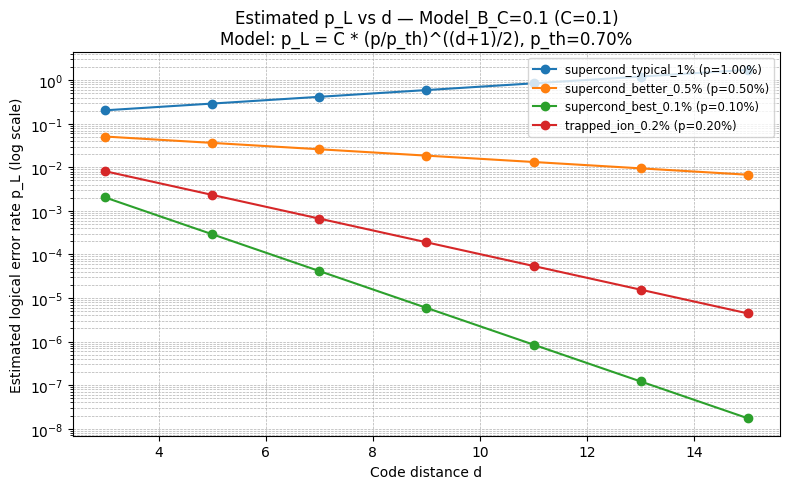

In [1]:
# display_dataframe_to_user failed in this environment; fallback to printing a compact table and plotting.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

p_th = 0.007
distances = np.array([3,5,7,9,11,13,15])
platforms = {
    'supercond_typical_1%': 0.01,
    'supercond_better_0.5%': 0.005,
    'supercond_best_0.1%': 0.001,
    'trapped_ion_0.2%': 0.002
}
models = {
    'Model_A_C=1': 1.0,
    'Model_B_C=0.1': 0.1
}

rows = []
for model_name, C in models.items():
    for plat_name, p in platforms.items():
        ratio = p / p_th
        for d in distances:
            exponent = (d + 1) / 2.0
            p_L = C * (ratio ** exponent)
            rows.append({'model': model_name, 'platform': plat_name, 'd': d, 'p': p, 'p_L': p_L})

df = pd.DataFrame(rows)
pivot = df.pivot_table(index='d', columns=['model','platform'], values='p_L')
# Print compact numeric table (rounded)
print("Estimated p_L table (rounded):")
with pd.option_context('display.float_format', '{:0.3e}'.format):
    print(pivot)

# Plotting figures
for model_name, C in models.items():
    fig, ax = plt.subplots(figsize=(8,5))
    for plat_name in platforms.keys():
        subset = df[(df['model']==model_name) & (df['platform']==plat_name)]
        ax.plot(subset['d'], subset['p_L'], marker='o', label=f"{plat_name} (p={platforms[plat_name]*100:.2f}%)")
    ax.set_yscale('log')
    ax.set_xlabel('Code distance d')
    ax.set_ylabel('Estimated logical error rate p_L (log scale)')
    ax.set_title(f"Estimated p_L vs d — {model_name} (C={C})\nModel: p_L = C * (p/p_th)^((d+1)/2), p_th={p_th*100:.2f}%")
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend(loc='upper right', fontsize='small')
    plt.tight_layout()
    plt.show()


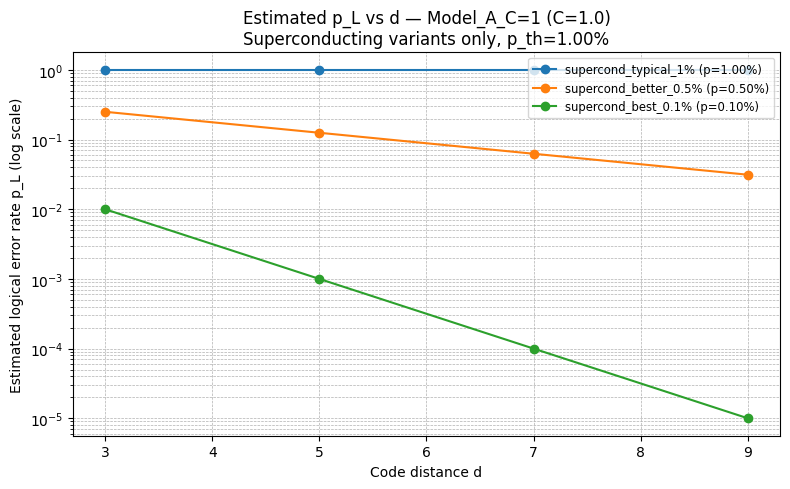

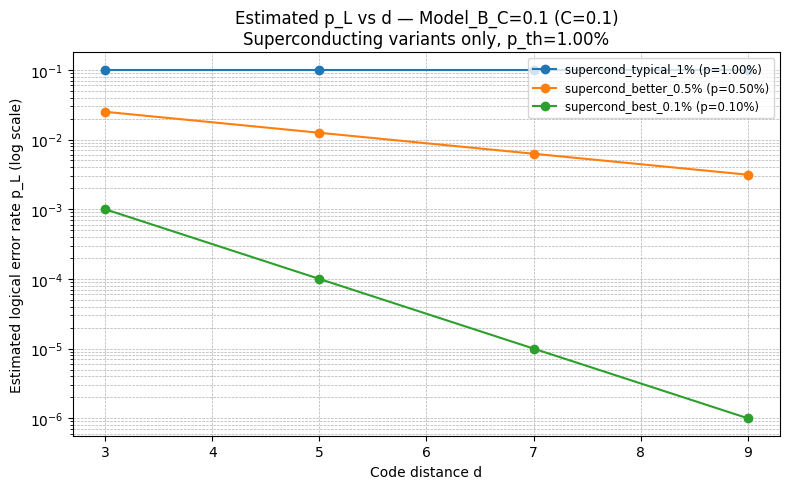

In [3]:
# Plot p_L vs d for superconducting platforms with every value of d (not just odd distances).
# We'll use d from 1 to 15 inclusive (though practically only odd d are code distances, but user requested every value).

import numpy as np
import matplotlib.pyplot as plt

p_th = 0.01
distances = [3,5,7,9]
platforms = {
    'supercond_typical_1%': 0.01,
    'supercond_better_0.5%': 0.005,
    'supercond_best_0.1%': 0.001
}
models = {
    'Model_A_C=1': 1.0,
    'Model_B_C=0.1': 0.1
}

for model_name, C in models.items():
    fig, ax = plt.subplots(figsize=(8,5))
    for plat_name, p in platforms.items():
        ratio = p / p_th
        p_Ls = []
        for d in distances:
            exponent = (d + 1) / 2.0
            p_L = C * (ratio ** exponent)
            p_Ls.append(p_L)
        ax.plot(distances, p_Ls, marker='o', label=f"{plat_name} (p={p*100:.2f}%)")
    ax.set_yscale('log')
    ax.set_xlabel('Code distance d')
    ax.set_ylabel('Estimated logical error rate p_L (log scale)')
    ax.set_title(f"Estimated p_L vs d — {model_name} (C={C})\nSuperconducting variants only, p_th={p_th*100:.2f}%")
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend(loc='upper right', fontsize='small')
    plt.tight_layout()
    plt.show()


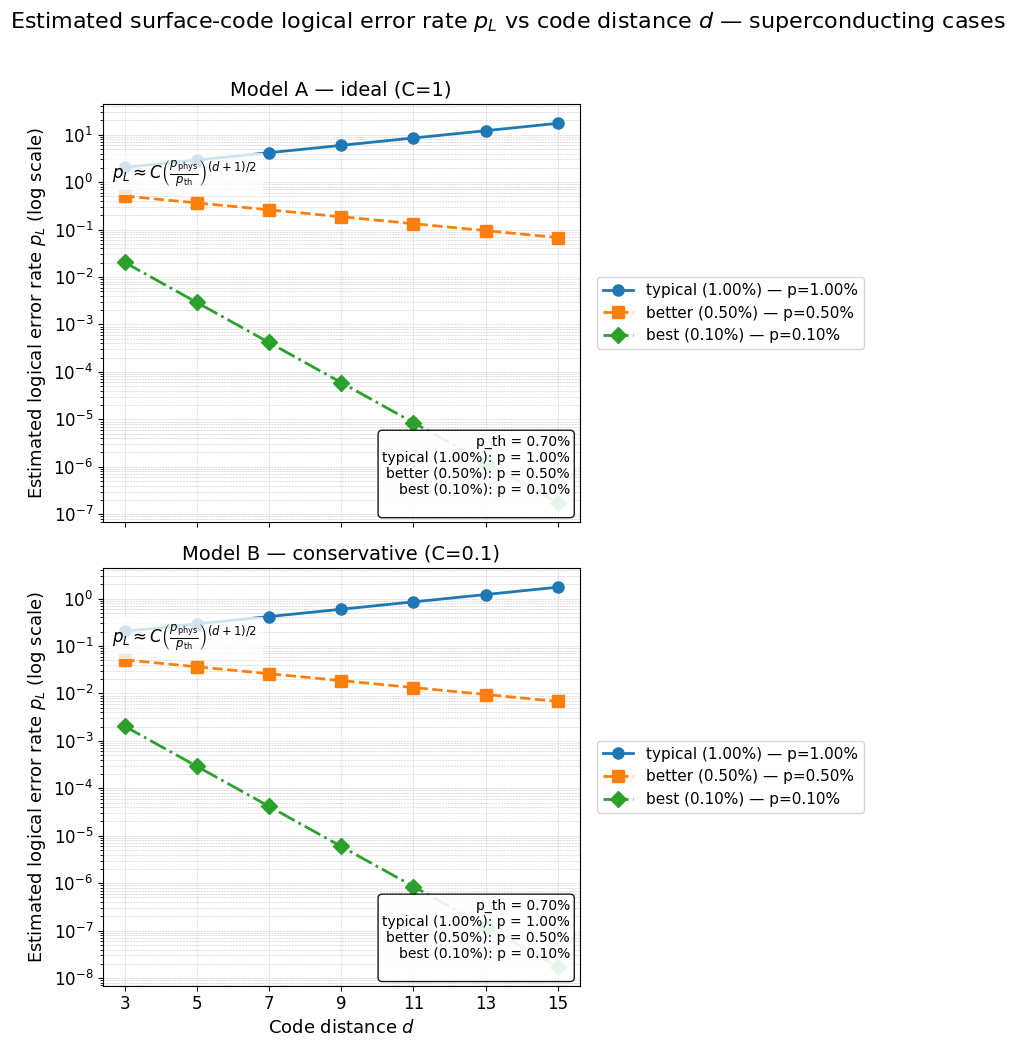

In [5]:
# Fix LaTeX formula rendering: matplotlib mathtext does not support \tfrac, use \frac instead.
import numpy as np
import matplotlib.pyplot as plt

p_th = 0.01  # threshold
distances = np.arange(3, 16, 2)  # odd distances 3,5,...,15
platforms = {
    'typical (1.00%)': 0.01,
    'better (0.50%)': 0.005,
    'best (0.10%)': 0.001
}
models = {
    'Model A — ideal (C=1)': 1.0,
    'Model B — conservative (C=0.1)': 0.1
}

plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 13,
    "legend.fontsize": 11,
    "figure.titlesize": 16
})

markers = ['o', 's', 'D']
linestyles = ['-', '--', '-.']

fig, axs = plt.subplots(2, 1, figsize=(10, 11), sharex=True)
fig.suptitle("Estimated surface-code logical error rate $p_L$ vs code distance $d$ — superconducting cases", y=0.95)

for ax, (model_name, C) in zip(axs, models.items()):
    for (plat_idx, (plat_label, p)) in enumerate(platforms.items()):
        ratio = p / p_th
        exponents = (distances + 1) / 2.0
        p_Ls = C * (ratio ** exponents)
        ax.plot(distances, p_Ls, marker=markers[plat_idx], linestyle=linestyles[plat_idx],
                linewidth=2.0, markersize=8, label=f"{plat_label} — p={p*100:.2f}%")
    ax.set_yscale('log')
    ax.set_xlabel("Code distance $d$" if ax is axs[-1] else "")
    ax.set_ylabel("Estimated logical error rate $p_L$ (log scale)")
    ax.set_title(model_name)
    ax.grid(which='both', linestyle='--', linewidth=0.4, alpha=0.7)
    ax.set_xticks(distances)
    ax.tick_params(axis='x', which='both')
    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
    formula = r"$p_L \approx C\left(\frac{p_{\mathrm{phys}}}{p_{\mathrm{th}}}\right)^{(d+1)/2}$"
    ax.text(0.02, 0.82, formula, transform=ax.transAxes, fontsize=12,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    phys_info = "p_th = {:.2f}%\n".format(p_th*100)
    for plat_label, p in platforms.items():
        phys_info += f"{plat_label}: p = {p*100:.2f}%\n"
    ax.text(0.98, 0.02, phys_info, transform=ax.transAxes, fontsize=10,
            verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.9, boxstyle='round'))

plt.tight_layout(rect=[0, 0, 0.88, 0.94])
plt.show()


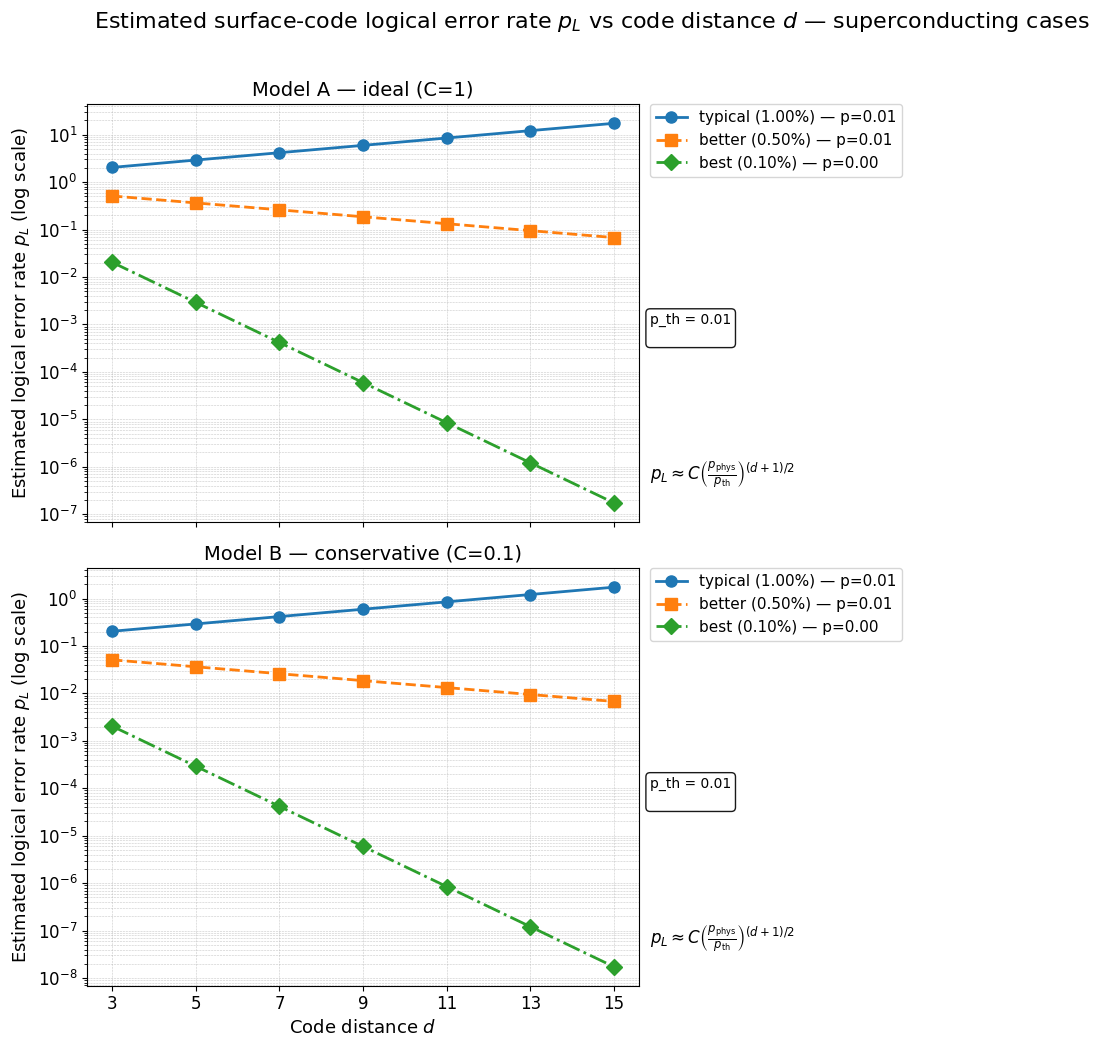

In [8]:
# Move the formula box outside the plot area as well, to keep the graph fully clear.
# We'll align it above each subplot on the right side, similar to legend/info.

import numpy as np
import matplotlib.pyplot as plt

p_th = 0.007  # threshold
distances = np.arange(3, 16, 2)  # odd distances 3,5,...,15
platforms = {
    'typical (1.00%)': 0.01,
    'better (0.50%)': 0.005,
    'best (0.10%)': 0.001
}
models = {
    'Model A — ideal (C=1)': 1.0,
    'Model B — conservative (C=0.1)': 0.1
}

plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 13,
    "legend.fontsize": 11,
    "figure.titlesize": 16
})

markers = ['o', 's', 'D']
linestyles = ['-', '--', '-.']

fig, axs = plt.subplots(2, 1, figsize=(12, 11), sharex=True)
fig.suptitle("Estimated surface-code logical error rate $p_L$ vs code distance $d$ — superconducting cases", y=0.95)

for ax, (model_name, C) in zip(axs, models.items()):
    for (plat_idx, (plat_label, p)) in enumerate(platforms.items()):
        ratio = p / p_th
        exponents = (distances + 1) / 2.0
        p_Ls = C * (ratio ** exponents)
        ax.plot(distances, p_Ls, marker=markers[plat_idx], linestyle=linestyles[plat_idx],
                linewidth=2.0, markersize=8, label=f"{plat_label} — p={p:.2f}")
    ax.set_yscale('log')
    ax.set_xlabel("Code distance $d$" if ax is axs[-1] else "")


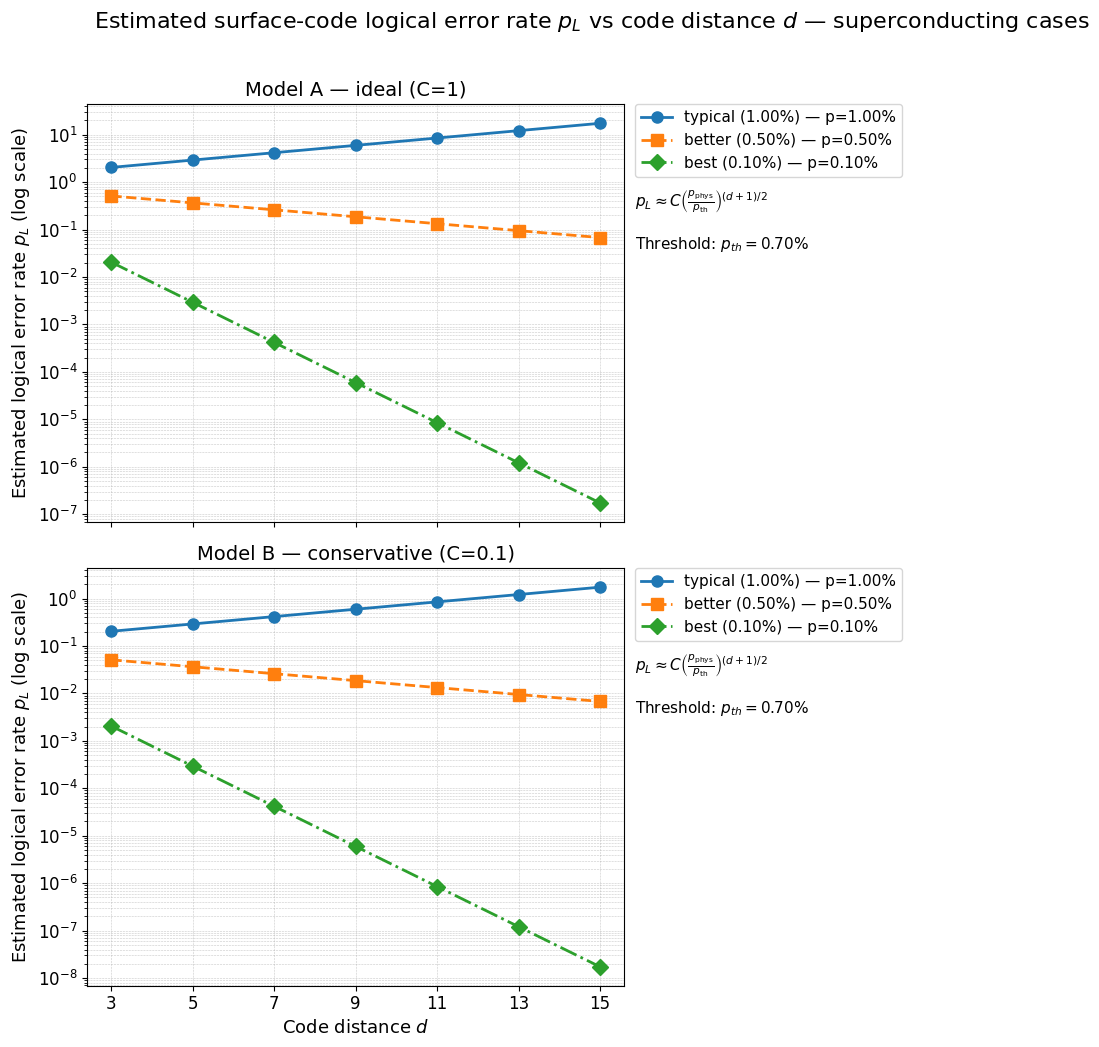

In [18]:
import numpy as np
import matplotlib.pyplot as plt

p_th = 0.007  # threshold
distances = np.arange(3, 16, 2)  # odd distances 3,5,...,15
platforms = {
    'typical (1.00%)': 0.01,
    'better (0.50%)': 0.005,
    'best (0.10%)': 0.001
}
models = {
    'Model A — ideal (C=1)': 1.0,
    'Model B — conservative (C=0.1)': 0.1
}

plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 13,
    "legend.fontsize": 11,
    "figure.titlesize": 16
})

markers = ['o', 's', 'D']
linestyles = ['-', '--', '-.']

fig, axs = plt.subplots(2, 1, figsize=(12, 11), sharex=True)
fig.suptitle("Estimated surface-code logical error rate $p_L$ vs code distance $d$ — superconducting cases", y=0.95)

for ax, (model_name, C) in zip(axs, models.items()):
    for (plat_idx, (plat_label, p)) in enumerate(platforms.items()):
        ratio = p / p_th
        exponents = (distances + 1) / 2.0
        p_Ls = C * (ratio ** exponents)
        ax.plot(distances, p_Ls, marker=markers[plat_idx], linestyle=linestyles[plat_idx],
                linewidth=2.0, markersize=8, label=f"{plat_label} — p={p*100:.2f}%")
    ax.set_yscale('log')
    ax.set_xlabel("Code distance $d$" if ax is axs[-1] else "")
    ax.set_ylabel("Estimated logical error rate $p_L$ (log scale)")
    ax.set_title(model_name)
    ax.grid(which='both', linestyle='--', linewidth=0.4, alpha=0.7)
    ax.set_xticks(distances)
    ax.tick_params(axis='x', which='both')

    # Legend outside on right
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), borderaxespad=0.)

    # # Legend outside on right
    # ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), borderaxespad=0.)

    # Formula + p_th box
    formula = (r"$p_L \approx C\left(\frac{p_{\mathrm{phys}}}{p_{\mathrm{th}}}\right)^{(d+1)/2}$"
               f"\n\nThreshold: $p_{{th}} = {p_th*100:.2f}\\%$")
    ax.text(1.02, 0.80, formula, transform=ax.transAxes, fontsize=11,
            verticalalignment='top', horizontalalignment='left',
            bbox=dict(facecolor='white', alpha=0.85, edgecolor='none'))

    # # Info box outside further below
    # phys_info = "p_th = {:.2f}%\n".format(p_th*100)
    # for plat_label, p in platforms.items():
    #     phys_info += f"{plat_label}: p = {p*100:.2f}%\n"
    # ax.text(1.02, 0.55, phys_info, transform=ax.transAxes, fontsize=10,
    #         verticalalignment='top', horizontalalignment='left',
    #         bbox=dict(facecolor='white', alpha=0.9, boxstyle='round'))

plt.tight_layout(rect=[0, 0, 0.78, 0.94])
plt.show()


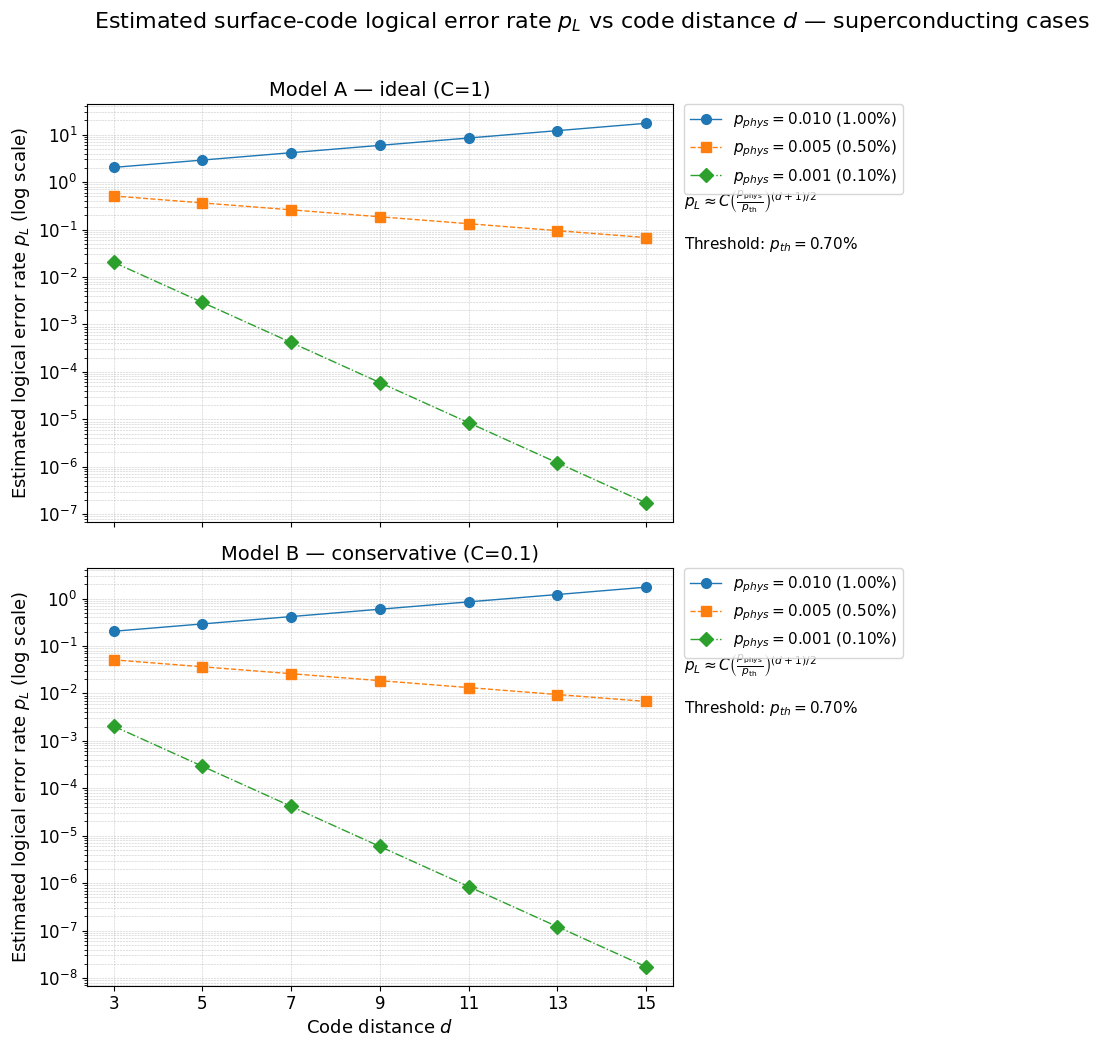

In [27]:
import numpy as np
import matplotlib.pyplot as plt

p_th = 0.007  # threshold
distances = np.arange(3, 16, 2)  # odd distances 3,5,...,15
platforms = {
    'typical (1.00%)': 0.01,
    'better (0.50%)': 0.005,
    'best (0.10%)': 0.001
}
models = {
    'Model A — ideal (C=1)': 1.0,
    'Model B — conservative (C=0.1)': 0.1
}

plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 13,
    "legend.fontsize": 11,
    "figure.titlesize": 16
})

markers = ['o', 's', 'D']
linestyles = ['-', '--', '-.']

fig, axs = plt.subplots(2, 1, figsize=(12, 11), sharex=True)
fig.suptitle("Estimated surface-code logical error rate $p_L$ vs code distance $d$ — superconducting cases", y=0.95)

for ax, (model_name, C) in zip(axs, models.items()):
    for (plat_idx, (plat_label, p)) in enumerate(platforms.items()):
        ratio = p / p_th
        exponents = (distances + 1) / 2.0
        p_Ls = C * (ratio ** exponents)
        ax.plot(distances, p_Ls, marker=markers[plat_idx], linestyle=linestyles[plat_idx],
                linewidth=1.0, markersize=7, 
                label=f"$p_{{phys}} = {p:.3f}$ ({p*100:.2f}%)")

    ax.set_yscale('log')
    ax.set_xlabel("Code distance $d$" if ax is axs[-1] else "")
    ax.set_ylabel("Estimated logical error rate $p_L$ (log scale)")
    ax.set_title(model_name)
    ax.grid(which='both', linestyle='--', linewidth=0.4, alpha=0.7)
    ax.set_xticks(distances)
    ax.tick_params(axis='x', which='both')

    # Legend outside on right
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), borderaxespad=0.)

    # Formula + p_th box
    formula = (r"$p_L \approx C\left(\frac{p_{\mathrm{phys}}}{p_{\mathrm{th}}}\right)^{(d+1)/2}$"
               f"\n\nThreshold: $p_{{th}} = {p_th*100:.2f}\\%$")
    ax.text(1.02, 0.80, formula, transform=ax.transAxes, fontsize=11,
            verticalalignment='top', horizontalalignment='left',
            bbox=dict(facecolor='white', alpha=0.85, edgecolor='none'))

plt.tight_layout(rect=[0, 0, 0.78, 0.94])
plt.show()


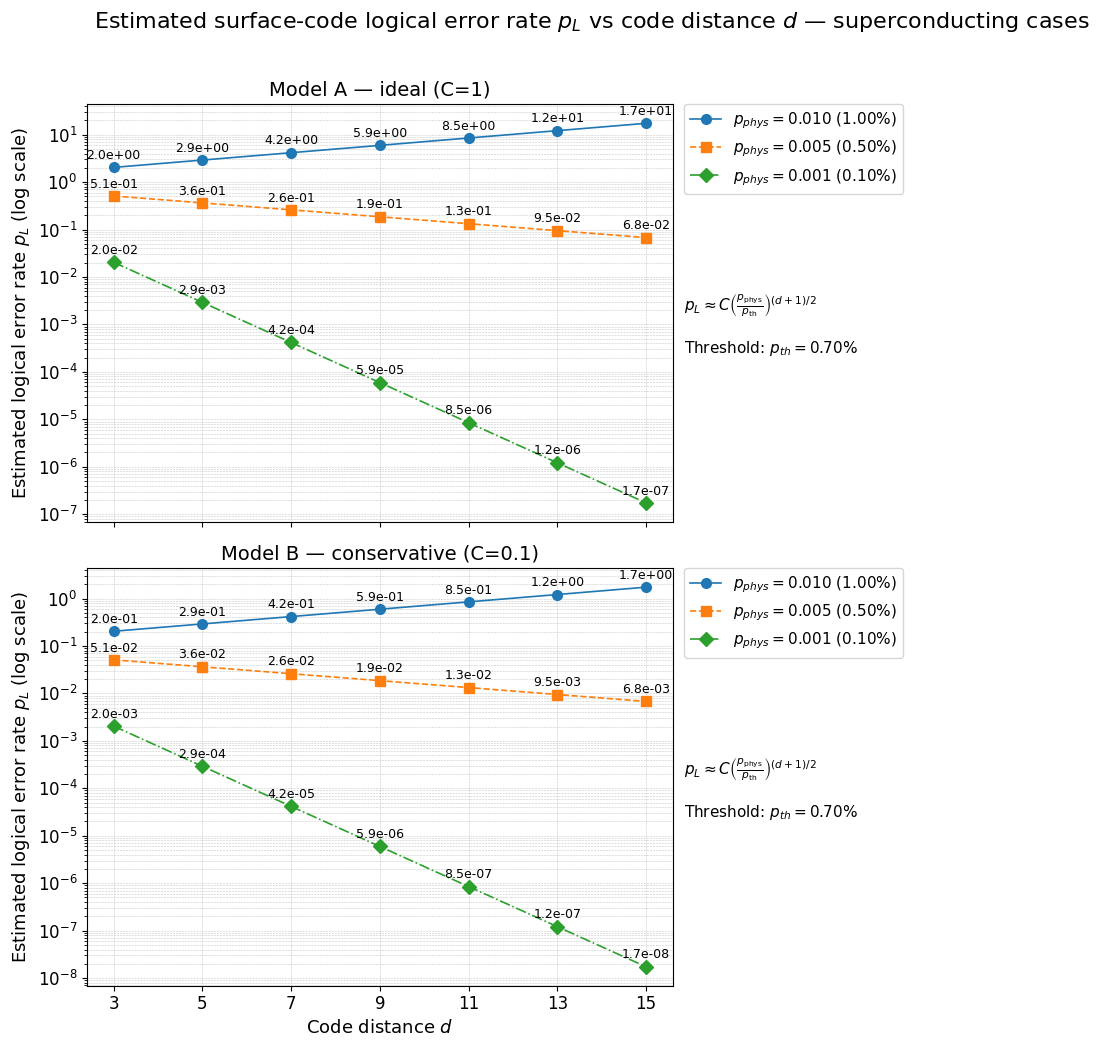

In [28]:
import numpy as np
import matplotlib.pyplot as plt

p_th = 0.007  # threshold
distances = np.arange(3, 16, 2)  # odd distances 3,5,...,15
platforms = {
    'typical (1.00%)': 0.01,
    'better (0.50%)': 0.005,
    'best (0.10%)': 0.001
}
models = {
    'Model A — ideal (C=1)': 1.0,
    'Model B — conservative (C=0.1)': 0.1
}

plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 13,
    "legend.fontsize": 11,
    "figure.titlesize": 16
})

markers = ['o', 's', 'D']
linestyles = ['-', '--', '-.']

fig, axs = plt.subplots(2, 1, figsize=(12, 11), sharex=True)
fig.suptitle("Estimated surface-code logical error rate $p_L$ vs code distance $d$ — superconducting cases", y=0.95)

for ax, (model_name, C) in zip(axs, models.items()):
    for (plat_idx, (plat_label, p)) in enumerate(platforms.items()):
        ratio = p / p_th
        exponents = (distances + 1) / 2.0
        p_Ls = C * (ratio ** exponents)

        # Plot the curve
        ax.plot(distances, p_Ls, marker=markers[plat_idx], linestyle=linestyles[plat_idx],
                linewidth=1.2, markersize=7, 
                label=f"$p_{{phys}} = {p:.3f}$ ({p*100:.2f}%)")

        # Annotate each point with exact p_L value (scientific notation)
        for (d, val) in zip(distances, p_Ls):
            ax.annotate(f"{val:.1e}", 
                        (d, val), 
                        textcoords="offset points", 
                        xytext=(0, 6),  # shift a little above marker
                        ha='center', fontsize=9, color="black")

    ax.set_yscale('log')
    ax.set_xlabel("Code distance $d$" if ax is axs[-1] else "")
    ax.set_ylabel("Estimated logical error rate $p_L$ (log scale)")
    ax.set_title(model_name)
    ax.grid(which='both', linestyle='--', linewidth=0.4, alpha=0.7)
    ax.set_xticks(distances)
    ax.tick_params(axis='x', which='both')

    # Legend outside on right
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), borderaxespad=0.)

    # Formula + threshold box (moved lower to avoid overlap with legend)
    formula = (r"$p_L \approx C\left(\frac{p_{\mathrm{phys}}}{p_{\mathrm{th}}}\right)^{(d+1)/2}$"
               f"\n\nThreshold: $p_{{th}} = {p_th*100:.2f}\\%$")
    ax.text(1.02, 0.55, formula, transform=ax.transAxes, fontsize=11,
            verticalalignment='top', horizontalalignment='left',
            bbox=dict(facecolor='white', alpha=0.85, edgecolor='none'))

plt.tight_layout(rect=[0, 0, 0.78, 0.94])
plt.show()


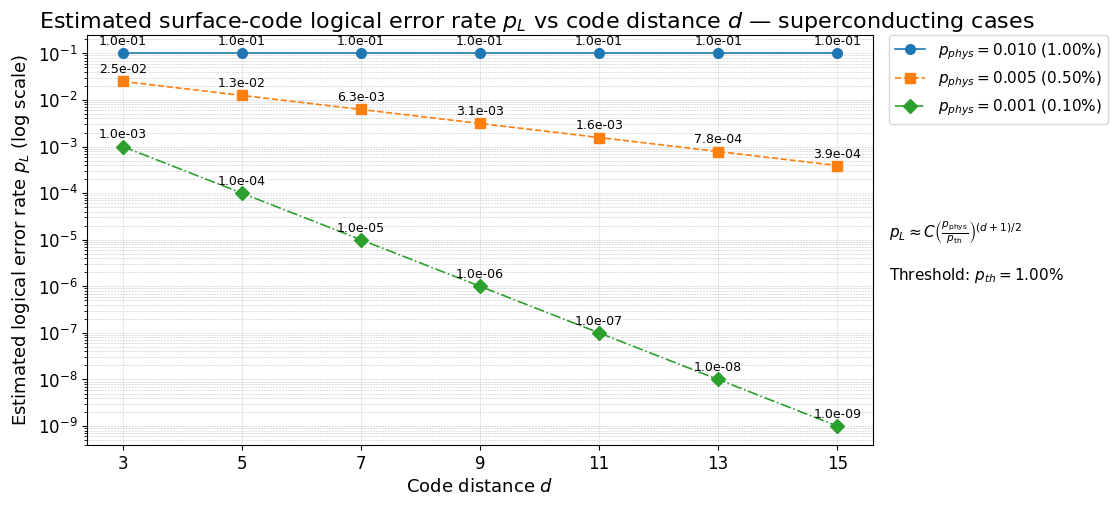

In [36]:
import numpy as np
import matplotlib.pyplot as plt

p_th = 0.01  # threshold
distances = np.arange(3, 16, 2)  # odd distances 3,5,...,15
platforms = {
    'typical (1.00%)': 0.01,
    'better (0.50%)': 0.005,
    'best (0.10%)': 0.001
}
models = {
    # 'Model A — ideal (C=1)': 1.0,
    'Model B — conservative (C=0.1)': 0.1
}

plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 13,
    "legend.fontsize": 11,
    "figure.titlesize": 16
})

markers = ['o', 's', 'D']
linestyles = ['-', '--', '-.']

# dynamically set number of rows
n_models = len(models)
fig, axs = plt.subplots(n_models, 1, figsize=(12, 5 * n_models), sharex=True)

# make axs always iterable (even if only one subplot)
if n_models == 1:
    axs = [axs]

fig.suptitle("Estimated surface-code logical error rate $p_L$ vs code distance $d$ — superconducting cases\n", y=0.98)

for ax, (model_name, C) in zip(axs, models.items()):
    for (plat_idx, (plat_label, p)) in enumerate(platforms.items()):
        ratio = p / p_th
        exponents = (distances + 1) / 2.0
        p_Ls = C * (ratio ** exponents)

        # Plot the curve
        ax.plot(distances, p_Ls, marker=markers[plat_idx], linestyle=linestyles[plat_idx],
                linewidth=1.2, markersize=7, 
                label=f"$p_{{phys}} = {p:.3f}$ ({p*100:.2f}%)")

       # Annotate each point with exact p_L value (scientific notation)
        for (d, val) in zip(distances, p_Ls):
            ax.annotate(f"{val:.1e}", 
                        (d, val), 
                        textcoords="offset points", 
                        xytext=(0, 6),  # shift a little above marker
                        ha='center', fontsize=9, color="black")

    ax.set_yscale('log')
    ax.set_xlabel("Code distance $d$")
    ax.set_ylabel("Estimated logical error rate $p_L$ (log scale)")
    # ax.set_title(model_name)
    ax.grid(which='both', linestyle='--', linewidth=0.4, alpha=0.7)
    ax.set_xticks(distances)

    # Legend outside on right
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), borderaxespad=0.)

    # Formula + threshold box
    formula = (r"$p_L \approx C\left(\frac{p_{\mathrm{phys}}}{p_{\mathrm{th}}}\right)^{(d+1)/2}$"
               f"\n\nThreshold: $p_{{th}} = {p_th*100:.2f}\\%$")
    ax.text(1.02, 0.55, formula, transform=ax.transAxes, fontsize=11,
            verticalalignment='top', horizontalalignment='left',
            bbox=dict(facecolor='white', alpha=0.85, edgecolor='none'))

# adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, right=0.78, top=0.93)
plt.show()


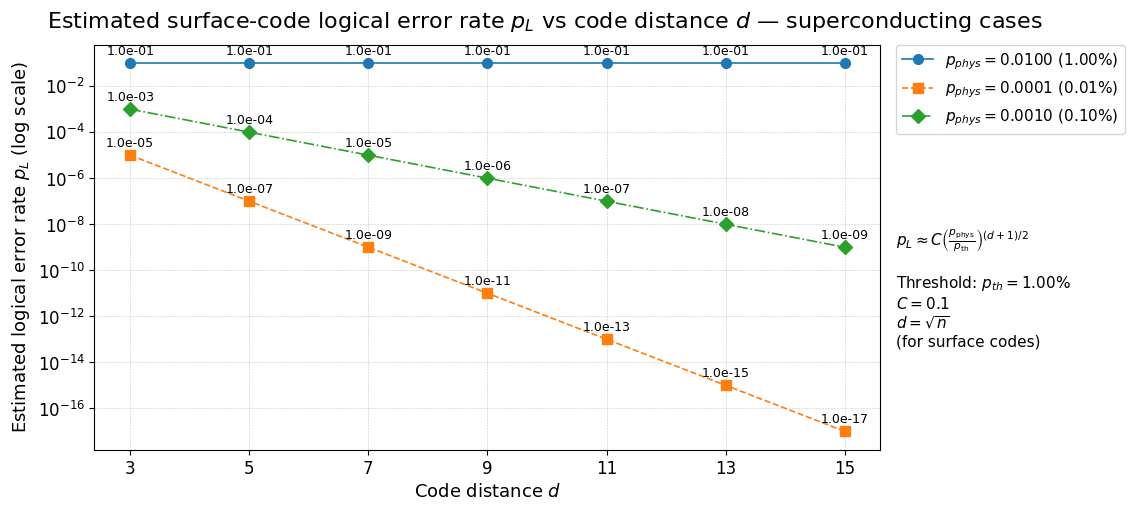

In [43]:
import numpy as np
import matplotlib.pyplot as plt

p_th = 0.01  # threshold
distances = np.arange(3, 16, 2)  # odd distances 3,5,...,15
platforms = {
    'typical (1.00%)': 0.01,
    'better (0.01%)': 0.0001,
    'best (0.10%)': 0.001
}
models = {
    # 'Model A — ideal (C=1)': 1.0,
    'Model B — conservative (C=0.1)': 0.1
}

plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 13,
    "legend.fontsize": 11,
    "figure.titlesize": 16
})

markers = ['o', 's', 'D']
linestyles = ['-', '--', '-.']

# dynamically set number of rows
n_models = len(models)
fig, axs = plt.subplots(n_models, 1, figsize=(12, 5 * n_models), sharex=True)

# make axs always iterable (even if only one subplot)
if n_models == 1:
    axs = [axs]

# main title (increase y a little for more gap)
fig.suptitle("Estimated surface-code logical error rate $p_L$ vs code distance $d$ — superconducting cases",
             y=0.99)

for ax, (model_name, C) in zip(axs, models.items()):
    for (plat_idx, (plat_label, p)) in enumerate(platforms.items()):
        ratio = p / p_th
        exponents = (distances + 1) / 2.0
        p_Ls = C * (ratio ** exponents)

        # Plot the curve
        ax.plot(distances, p_Ls, marker=markers[plat_idx], linestyle=linestyles[plat_idx],
                linewidth=1.2, markersize=7, 
                label=f"$p_{{phys}} = {p:.4f}$ ({p*100:.2f}%)")

        # Annotate each point with exact p_L value
        for (d, val) in zip(distances, p_Ls):
            ax.annotate(f"{val:.1e}", 
                        (d, val), 
                        textcoords="offset points", 
                        xytext=(0, 6),
                        ha='center', fontsize=9, color="black")

    ax.set_yscale('log')
    ax.set_xlabel("Code distance $d$")
    ax.set_ylabel("Estimated logical error rate $p_L$ (log scale)")
    ax.grid(which='both', linestyle='--', linewidth=0.4, alpha=0.7)
    ax.set_xticks(distances)

    # Legend outside on right
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), borderaxespad=0.)

    # Formula + threshold box with extras
    formula = (
        r"$p_L \approx C\left(\frac{p_{\mathrm{phys}}}{p_{\mathrm{th}}}\right)^{(d+1)/2}$"
        f"\n\nThreshold: $p_{{th}} = {p_th*100:.2f}\\%$"
        f"\n$C = {C}$\n"
        r"$d = \sqrt{n}$"
        "\n(for surface codes)"
    )
    ax.text(1.02, 0.55, formula, transform=ax.transAxes, fontsize=11,
            verticalalignment='top', horizontalalignment='left',
            bbox=dict(facecolor='white', alpha=0.85, edgecolor='none'))

# adjust spacing
plt.subplots_adjust(hspace=0.4, right=0.78, top=0.92)
plt.show()


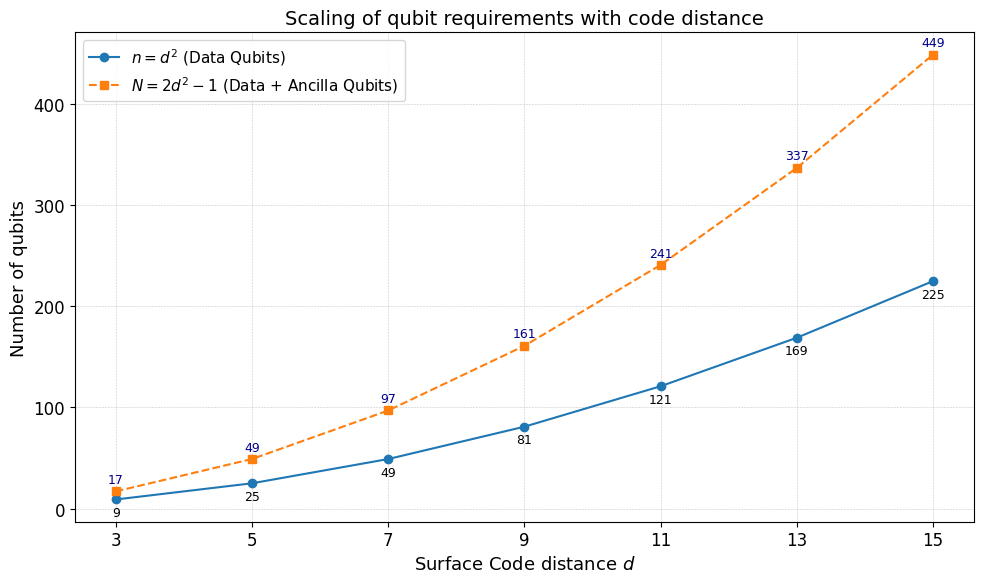

In [51]:
import numpy as np
import matplotlib.pyplot as plt

distances = np.arange(3, 16, 2)  # odd distances 3,5,...,15

# relations
n_phys = distances**2
n_total = 2*distances**2 - 1

plt.figure(figsize=(10, 6))
plt.plot(distances, n_phys, marker='o', linestyle='-', linewidth=1.5, label=r"$n = d^2$ (Data Qubits)")
plt.plot(distances, n_total, marker='s', linestyle='--', linewidth=1.5, label=r"$N = 2d^2 - 1$ (Data + Ancilla Qubits)")

# annotate points
for d, n, N in zip(distances, n_phys, n_total):
    plt.annotate(str(n), (d, n), textcoords="offset points", xytext=(0, -12), ha='center', fontsize=9)
    plt.annotate(str(N), (d, N), textcoords="offset points", xytext=(0, 6), ha='center', fontsize=9, color="darkblue")

plt.xlabel("Surface Code distance $d$")
plt.ylabel("Number of qubits")
plt.title("Scaling of qubit requirements with code distance")
plt.grid(linestyle="--", linewidth=0.4, alpha=0.7)
plt.legend()

# force x-axis to show only odd distances
plt.xticks(distances)

plt.tight_layout()
plt.show()
